In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


Loading the dependencies

In [30]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import average_precision_score, confusion_matrix
import matplotlib.pyplot as plt
print(os.listdir("../input"))

['creditcardfraud']


Loading the dataset and observing the data

In [31]:
data=pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [32]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [33]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


As we can see from the data description above, the 'Time' feature has a very high standard deviation, and when we look at some of the dataset above, it appears to be different for nearly all of the data instances. We will remove "Time" from our dataset because building a machine learning model on this feature is likely to overfit it.

In [34]:
data.drop("Time",axis=1,inplace=True)

There is apparently a huge class imbalance in this dataset. We can confirm this by plotting a seaborn countplot of the different class labels.

<Axes: xlabel='Class', ylabel='count'>

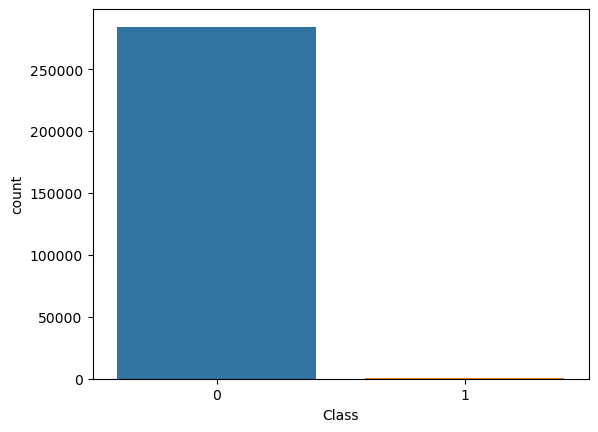

In [35]:
sns.countplot(x="Class", data=data)

As we can see from the above plot, fraudulent activities make up a very small fraction of this dataset. Let's further check to see if there are any null values in the data.

In [36]:
data.isnull().any().describe()

count        30
unique        1
top       False
freq         30
dtype: object

No null values exist in the data

**Splitting the dataset**

90% traing data and 5% each validation and test datset

In [37]:
limit=int(0.9*len(data))
train=data.loc[:limit]
val_test=data.loc[limit:]
val_test.reset_index(drop=True,inplace=True)
val_test_limit=int(0.5*len(val_test))
val=val_test.loc[:val_test_limit]
test=val_test.loc[val_test_limit:]

Let's check to see that the validation and test set include a fair amount of fraudulent activites before going any further.

In [38]:
print("Number of fraudulent transactions in the validation set: {}"\
      .format(val["Class"].value_counts()[1]))
print("Number of fraudulent transactions in the test set: {}"\
      .format(test["Class"].value_counts()[1]))

Number of fraudulent transactions in the validation set: 11
Number of fraudulent transactions in the test set: 11


We may now concentrate on creating a model that can precisely identify fraudulent activity. Given the extreme class imbalance in our dataset, an accurate model would be one that categorises all transactions as not being fraudulent. Additionally, there wouldn't be many fraudulent samples from which the model might learn what constitutes a fraudulent transaction. As a result, we need to figure out a strategy to balance the proportion of positive and negative examples in our training set. One way to achieve this is by either undersampling the negative cases or oversampling the positive ones. Undersampling the negative instances would involve reducing the number of non-fraudulent transactions until the ratio between positive and negative instances was approximately 1-to-1. Since we don't have that many data samples, I fear doing so would severely limit our model's performance, since it would have much less data to train on. We shall therefore oversample the positive instances in our training data.

To oversample the positive instances in our training set, we will add duplicates of the positive examples from our training set, but with slightly altered feature values.The copies of the data are somewhat changed from their original counterparts, but not significantly enough to end up teaching our model incorrect information. Each positive sample copy's feature values will be adjusted by multiplying them by a value between 0.9 and 1.1, which approximates the uniform distribution.

In [39]:
train_positive = train[train["Class"] == 1]
train_positive = pd.concat([train_positive] * int(len(train) / len(train_positive)), ignore_index=True)
noise = np.random.uniform(0.9, 1.1, train_positive.shape)
train_positive = train_positive.multiply(noise)
train_positive["Class"] = 1
train_extended = pd.concat([train, train_positive], ignore_index=True)
train_shuffled = train_extended.sample(frac=1, random_state=0).reset_index(drop=True)

The ratio of positive to negative instances in our training set should now be much more balanced.

<Axes: xlabel='Class', ylabel='count'>

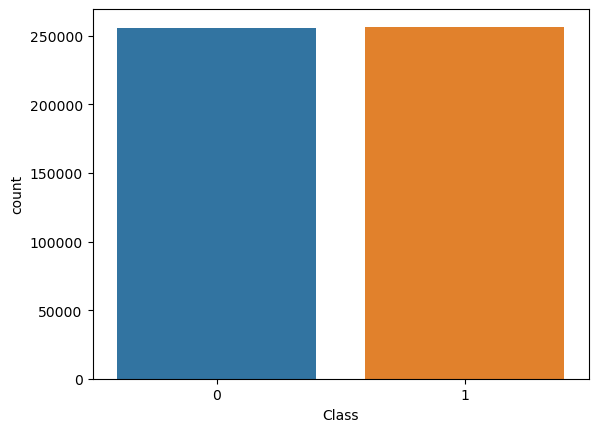

In [40]:
sns.countplot(x="Class",data=train_shuffled)

In [41]:
train_shuffled["Class"].value_counts()

1    256620
0    255857
Name: Class, dtype: int64

 Separating our train, validation, and test data into their predictors and labels.

In [42]:
X_train = train_shuffled.drop(labels=["Class"], axis=1)
Y_train = train_shuffled["Class"]
X_val = val.drop(labels=["Class"], axis=1)
Y_val = val["Class"]
X_test = test.drop(labels=["Class"], axis=1)
Y_test = test["Class"]


Let's also standardize the values in our dataset so that when building a machine learning model we don't unintentionally lend more weight to some features over others. We will fit a standardizer to the training data, and transform the training, validation, and test data based on this scaler.

In [43]:
scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train)
X_val[X_val.columns] = scaler.transform(X_val)
X_test[X_test.columns] = scaler.transform(X_test)

Building and train a feedforward neural network to detect fraudulent activity. The neural network will contain several layers of hidden units with ReLU activation functions, and a sigmoid output unit to output the probability of a given transaction being fraudulent. The Adam optimizer will be used with an initial learning rate of 1e-4 and a binary cross-entropy loss function. The model will be trained for a maximum of 50 epochs, though the learning rate of the Adam optimizer will be reduced by a factor of 0.1 if the validation loss does not improve after 3 epochs of training. This will continue until a minimum learning rate of 1e-6 is reached. If the validation loss does not improve after 5 epochs of training, we will halt training of the neural network.

In [44]:
model = Sequential()
model.add(Dense(64, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer=Adam(learning_rate=1e-4), loss="binary_crossentropy", metrics=["accuracy"])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 64)                1920      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dense_11 (Dense)            (None, 4)                 36        
                                                                 
 dense_12 (Dense)            (None, 2)                 10        
                                                                 
 dense_13 (Dense)            (None, 1)                

In [45]:
history = model.fit(X_train, 
                    Y_train, 
                    epochs=50, 
                    validation_data=(X_val, Y_val), 
                    callbacks=[ReduceLROnPlateau(patience=3, verbose=1, min_lr=1e-6), 
                               EarlyStopping(patience=5, verbose=1)])

Epoch 1/50
16015/16015 [==============================] - 38s 2ms/step - loss: 0.2689 - accuracy: 0.9500 - val_loss: 0.2246 - val_accuracy: 0.9955 - lr: 1.0000e-04
Epoch 2/50
16015/16015 [==============================] - 36s 2ms/step - loss: 0.1470 - accuracy: 0.9636 - val_loss: 0.0969 - val_accuracy: 0.9980 - lr: 1.0000e-04
Epoch 3/50
16015/16015 [==============================] - 37s 2ms/step - loss: 0.1335 - accuracy: 0.9642 - val_loss: 0.0777 - val_accuracy: 0.9988 - lr: 1.0000e-04
Epoch 4/50
16015/16015 [==============================] - 36s 2ms/step - loss: 0.1322 - accuracy: 0.9643 - val_loss: 0.0743 - val_accuracy: 0.9987 - lr: 1.0000e-04
Epoch 5/50
16015/16015 [==============================] - 36s 2ms/step - loss: 0.1313 - accuracy: 0.9645 - val_loss: 0.0724 - val_accuracy: 0.9991 - lr: 1.0000e-04
Epoch 6/50
16015/16015 [==============================] - 37s 2ms/step - loss: 0.1310 - accuracy: 0.9646 - val_loss: 0.0704 - val_accuracy: 0.9994 - lr: 1.0000e-04
Epoch 7/50
16015

**Analyzing our Model**

With training ceased for our neural network, let's observe how the loss and accuracy evolved during training for both the training and validation set.

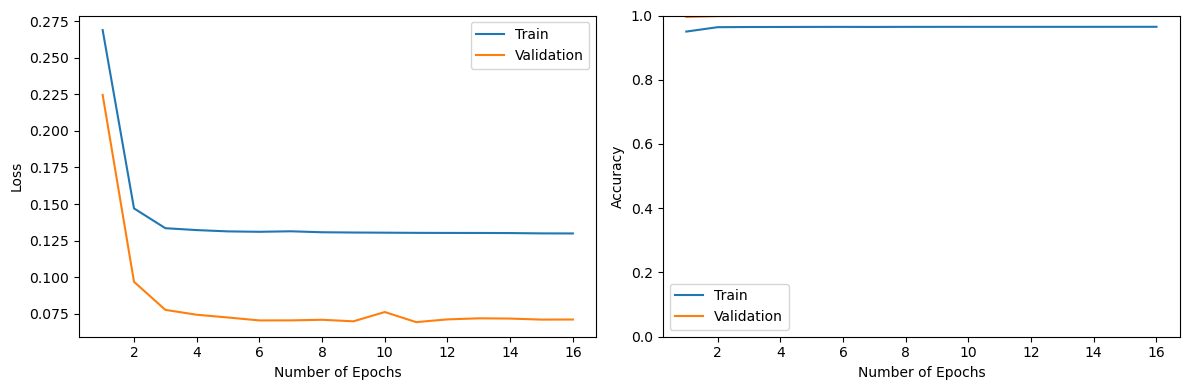

In [53]:
num_epochs = len(history.history["loss"])

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.lineplot(x=range(1, num_epochs+1), y=history.history["loss"], label="Train")
sns.lineplot(x=range(1, num_epochs+1), y=history.history["val_loss"], label="Validation")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
sns.lineplot(x=range(1, num_epochs+1), y=history.history["accuracy"], label="Train")
sns.lineplot(x=range(1, num_epochs+1), y=history.history["val_accuracy"], label="Validation")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.legend()

plt.tight_layout()
plt.show()


Viewing the loss and accuracy graphs, we can see that after some initial improvements, we seemed to reach convergence after only a few epochs. Let's view the accuracy achieved by this neural network on the test set.

In [47]:
test_results = model.evaluate(X_test, Y_test)

print("The model test accuracy is {}.".format(test_results[1]))

446/446 [==============================] - 1s 2ms/step - loss: 0.0728 - accuracy: 0.9990
The model test accuracy is 0.9990169405937195.


Achieving almost 100% accuracy on the test set is of course thrilling, but one must not forget about the huge class imbalance still present in the test set. A model that simply outputted that there were no fraudulent transactions would achieve high accuracy as well. The dataset info recommends using the AUPRC as an evaluation metric instead, to gather a better understanding of how well the model truly performed. We will use the average precision score instead, which is an evaluation metric available in scikit-learn that is sometimes used as an alternative to AUPRC. The average precision score will have a value between 0 and 1, with a better model having a greater score. Let's view the test average precision score for our model.

In [48]:
predictions = model.predict(X_test)
ap_score = average_precision_score(Y_test, predictions)
print("The model test average precision score is {}.".format(ap_score))


446/446 [==============================] - 1s 2ms/step
The model test average precision score is 0.40421390280248504.


In [49]:
print(predictions)

[[0.0660752]
 [0.0660752]
 [0.0660752]
 ...
 [0.0660752]
 [0.0660752]
 [0.0660752]]


As we can see, the model didn't perform quite as well as we initially thought. Let's view a confusion matrix of the predictions made by the model on the test set, to gain a better idea of what type of errors it is making.

In [50]:
threshold = 0.5
predicted_classes = (predictions > threshold).astype(int)
predicted_classes

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [51]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,predicted_classes)

0.772411039417364

(array([0.5, 1.5]),
 [Text(0, 0.5, 'Actual Negative'), Text(0, 1.5, 'Actual Positive')])

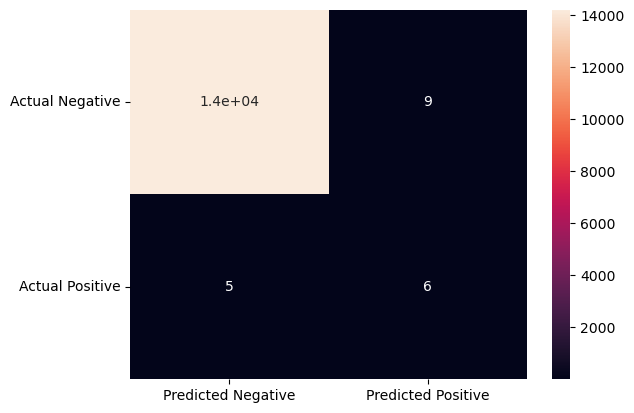

In [52]:

confusion = pd.DataFrame(confusion_matrix(Y_test, predicted_classes))
confusion.columns = ["Predicted Negative", "Predicted Positive"]
confusion.index = ["Actual Negative", "Actual Positive"]
sns.heatmap(confusion, annot=True)
plt.yticks(rotation=0)

Looking at the confusion matrix, we can see that while the neural network correctly identified most of the fraudulent transactions(around half of fraudlent transaction), it incorrectly identified a small number of non-fraudulent transactions as fraudlent transaction.

**Conclusion**

After building a machine learning model using a feedforward neural network, we were able to detect credit card fraud in almost half of the guilty transactions in the test set without significantly misclassifying legitimate transactions as fraudulent. Spending more time fine-tuning the neural network architecture, as well as manipulating the features in the dataset, could perhaps further improve upon these results.This kernel provides others with a good example of how to go about training a neural network for a binary classification problem with a very unbalanced dataset.